In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = 'car_evaluation.csv'

df = pd.read_csv(data, header=None)

In [3]:
# just to remove some update warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df.shape

(1728, 7)

In [5]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
# preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
X = df.drop(['class'], axis=1)

y = df['class']

In [9]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [10]:
# convert to nummericals
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

def cal_accuracy(depth):
    clf = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    return accuracy_score(y_train, y_pred_train),accuracy_score(y_test, y_pred_test)

depth: 2, training Accuracy: 0.7666, testing Accuracy: 0.8004
depth: 3, training Accuracy: 0.7865, testing Accuracy: 0.8021
depth: 4, training Accuracy: 0.8539, testing Accuracy: 0.8441
depth: 5, training Accuracy: 0.8686, testing Accuracy: 0.8774
depth: 6, training Accuracy: 0.9179, testing Accuracy: 0.8967
depth: 7, training Accuracy: 0.9404, testing Accuracy: 0.9335
depth: 8, training Accuracy: 0.9594, testing Accuracy: 0.9299
depth: 9, training Accuracy: 0.9775, testing Accuracy: 0.9440
depth: 10, training Accuracy: 0.9862, testing Accuracy: 0.9440
depth: 11, training Accuracy: 0.9948, testing Accuracy: 0.9597


Text(0, 0.5, 'Accuracy')

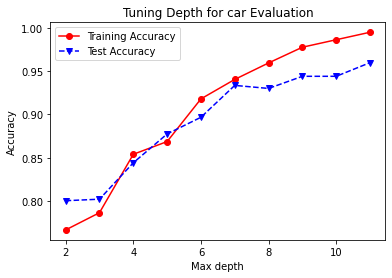

In [12]:
maxdepths = [2,3,4,5,6,7,8,9,10,11]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
index = 0
for depth in maxdepths:
    train,test = cal_accuracy(depth)
    trainAcc[index] = train
    testAcc[index] = test
    print ("depth: %d, training Accuracy: %0.4f, testing Accuracy: %0.4f" % (depth, train,  test))
    index += 1

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.title("Tuning Depth for car Evaluation") 
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')